This file contains maps created with geopandas, data from London Datastore and our dataset. Based on article "Let’s make a map! Using Geopandas, Pandas and Matplotlib to make a Choropleth map" by Ben Dexter Cooley from Towards Data Science.
[https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d](https://)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gdp
from matplotlib.patches import Patch
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize

# **Map with boroughs, initial and expanded ULEZ**

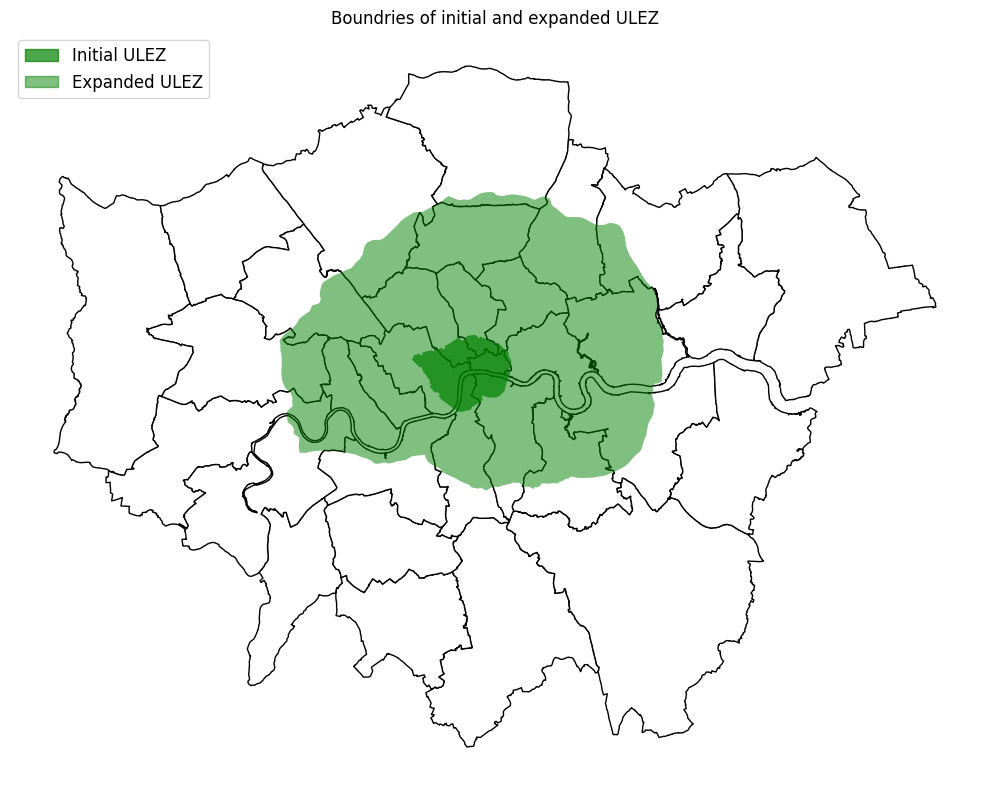

In [ ]:
boroughs = gdp.read_file('/content/drive/MyDrive/ULEZ/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.dbf')
ulez_initial = gdp.read_file('/content/drive/MyDrive/ULEZ/ULEZ.shp')
ulez_expanded = gdp.read_file('/content/drive/MyDrive/ULEZ/ULEZ_expansion.shp')

# plotting the map
fig, ax = plt.subplots(figsize=(10, 10))

# plotting London boroughs
boroughs.plot(ax=ax, color='white', edgecolor='black')

# plotting ULEZ initial area
ulez_initial_patch = Patch(color='green', alpha=0.7, label='Initial ULEZ')
ulez_initial.plot(ax=ax, color='green', alpha=0.7)

# plotting ULEZ expanded area
ulez_expanded_patch = Patch(color='green', alpha=0.5, label='Expanded ULEZ')
ulez_expanded.plot(ax=ax, color='green', alpha=0.5, label='Expanded ULEZ')

# setting plot title
plt.title('Boundries of initial and expanded ULEZ')

# removing x and y axis labels
ax.set_xticks([])
ax.set_yticks([])

# adding a legend
legend_handles = [ulez_initial_patch, ulez_expanded_patch]
ax.legend(handles=legend_handles, fontsize='large', loc='upper left')

# removing the axis
ax.axis('off')

plt.tight_layout()
plt.show()

#### **Maps with average NO2 by borough by year**

In [ ]:
# importing the expanded ULEZ dataset
exp_ulez_data = pd.read_csv('/content/drive/MyDrive/ULEZ/exp_ulez_clean.csv')
exp_ulez_data.head()

# converting the date format to datetime
exp_ulez_data['date'] = pd.to_datetime(exp_ulez_data['date'])

# defining the ULEZ introduction and expansion dates
ulez_introduction = '2019-04-08'
ulez_expansion = '2021-10-25'

# categorising data based on ULEZ introduction and expansion dates
exp_ulez_data['ulez_category'] = np.where(exp_ulez_data['date'] < ulez_introduction, 'Before ULEZ',
                               np.where(exp_ulez_data['date'] <= ulez_expansion, 'Initial ULEZ', 'After ULEZ expanded'))

# filtering data for the 'ulez_category' 'Before ULEZ'
before_ulez_df = exp_ulez_data[exp_ulez_data['ulez_category'] == 'Before ULEZ']
# grouping by 'site_borough' for 'Before ULEZ' and calculating the mean 'NO2_value'
grouped_before_ulez_df = before_ulez_df.groupby('site_borough')['NO2_value'].mean().reset_index()

# filtering data for the 'ulez_category' 'Initial ULEZ'
initial_ulez_df = exp_ulez_data[exp_ulez_data['ulez_category'] == 'Initial ULEZ']
# grouping by 'site_borough' for 'Initial ULEZ' and calculating the mean 'NO2_value'
grouped_initial_ulez_df = initial_ulez_df.groupby('site_borough')['NO2_value'].mean().reset_index()

# filtering data for the 'ulez_category' 'After ULEZ expanded'
expanded_ulez_df = exp_ulez_data[exp_ulez_data['ulez_category'] == 'After ULEZ expanded']
# grouping by 'site_borough' for 'After ULEZ expanded' and calculating the mean 'NO2_value'
grouped_expanded_ulez_df = expanded_ulez_df.groupby('site_borough')['NO2_value'].mean().reset_index()

# Before ULEZ

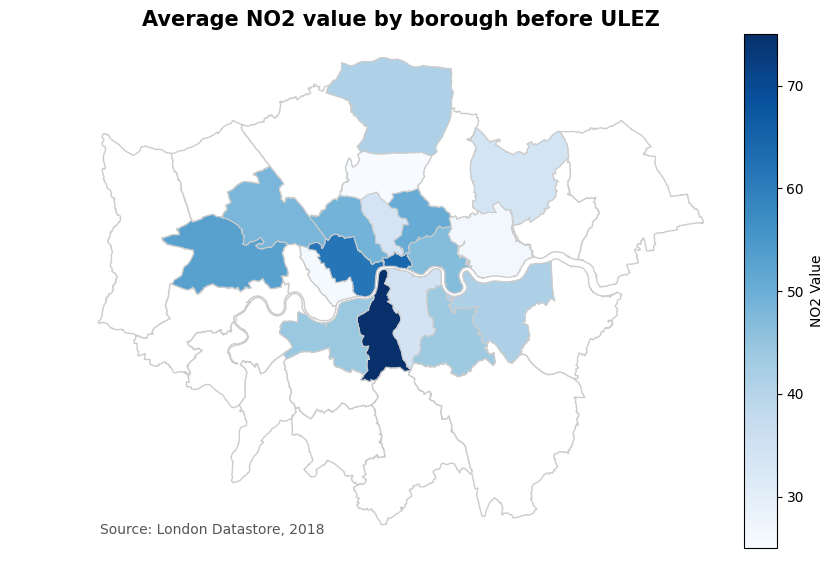

In [ ]:
# Map before ULEZ
# loading in a dbf file
boroughs = gdp.read_file('/content/drive/MyDrive/ULEZ/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.dbf')

# joining the geodataframe with the dataframe
merged_before_ulez = boroughs.set_index('NAME').join(grouped_before_ulez_df.set_index('site_borough'))

# setting a column we want to visualise on the map
variable = 'NO2_value'

# setting the range for the choropleth
vmin, vmax = 25, 75

# creating figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# creating map
boroughs.plot(ax=ax, color='white', edgecolor='0.8')
merged_before_ulez.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, cax=cax)

# customising and adding annotations
ax.axis('off')
ax.set_title('Average NO2 value by borough before ULEZ', fontdict={'fontsize': '15', 'fontweight': 'bold'})
ax.annotate('Source: London Datastore, 2018', xy=(0.1, 0.08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=10, color='#555555')

# creating a colorbar
sm = plt.cm.ScalarMappable(cmap='Blues', norm=Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = plt.colorbar(sm, cax=cax)
cbar.set_label('NO2 Value')

plt.tight_layout()
plt.show()

# Initial ULEZ

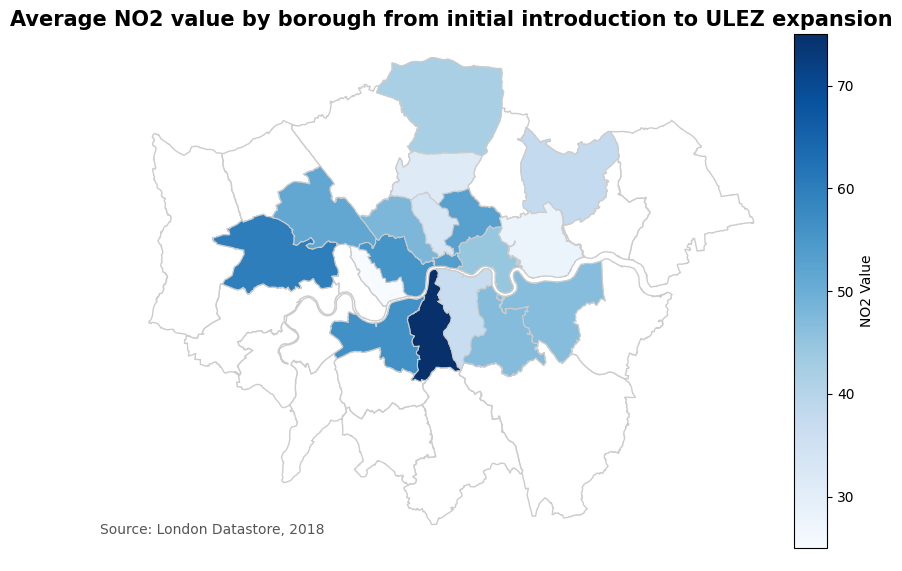

In [ ]:
# Map initial ULEZ
# loading in a dbf file
boroughs = gdp.read_file('/content/drive/MyDrive/ULEZ/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.dbf')

# joining the geodataframe with the dataframe
merged_initial_ulez = boroughs.set_index('NAME').join(grouped_initial_ulez_df.set_index('site_borough'))

# setting a column we want to visualise on the map
variable = 'NO2_value'

# setting the range for the choropleth
vmin, vmax = 25, 75

# creating figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# creating map
boroughs.plot(ax=ax, color='white', edgecolor='0.8')
merged_initial_ulez.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, cax=cax)

# customising and adding annotations
ax.axis('off')
ax.set_title('Average NO2 value by borough from initial introduction to ULEZ expansion', fontdict={'fontsize': '15', 'fontweight': 'bold'})
ax.annotate('Source: London Datastore, 2018', xy=(0.1, 0.08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=10, color='#555555')

# creating a colorbar
sm = plt.cm.ScalarMappable(cmap='Blues', norm=Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = plt.colorbar(sm, cax=cax)
cbar.set_label('NO2 Value')

plt.tight_layout()
plt.show()

# Expanded ULEZ

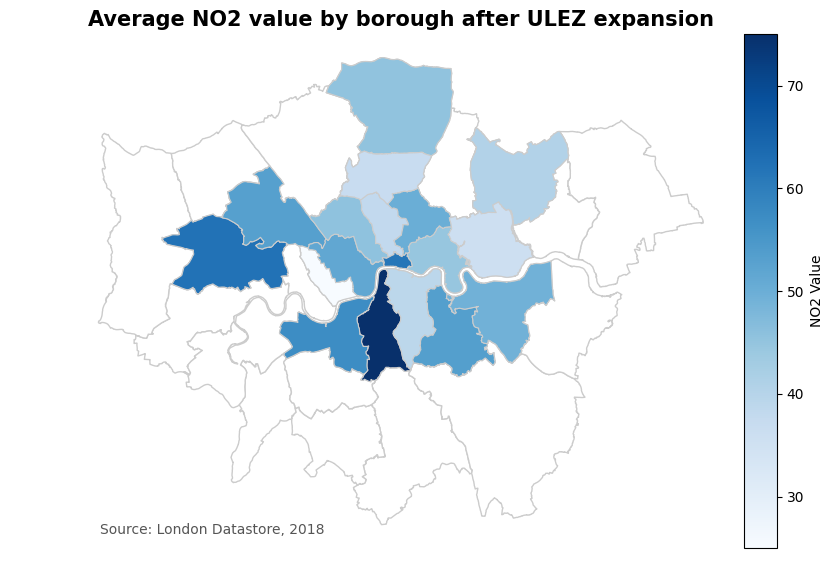

In [ ]:
# Map expanded ULEZ
# loading in a dbf file
boroughs = gdp.read_file('/content/drive/MyDrive/ULEZ/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.dbf')

# joining the geodataframe with the dataframe
merged_expanded_ulez = boroughs.set_index('NAME').join(grouped_expanded_ulez_df.set_index('site_borough'))

# setting a column we want to visualise on the map
variable = 'NO2_value'

# setting the range for the choropleth
vmin, vmax = 25, 75

# creating figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# creating map
boroughs.plot(ax=ax, color='white', edgecolor='0.8')
merged_expanded_ulez.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, cax=cax)

# customising and adding annotations
ax.axis('off')
ax.set_title('Average NO2 value by borough after ULEZ expansion', fontdict={'fontsize': '15', 'fontweight': 'bold'})
ax.annotate('Source: London Datastore, 2018', xy=(0.1, 0.08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=10, color='#555555')

# creating a colorbar
sm = plt.cm.ScalarMappable(cmap='Blues', norm=Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = plt.colorbar(sm, cax=cax)
cbar.set_label('NO2 Value')

plt.tight_layout()
plt.show()